# Imports

In [79]:
#manipulação de dados
import pandas as pd
import numpy as np

#webscrapling
from urllib.request import urlretrieve

#processamento de dados
import inflection

#visualização
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.core.display import HTML

## Helper functions

In [80]:
# configuração do jupyter notebook e plotagem de imagens
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [81]:
import warnings
warnings.filterwarnings("ignore")

# 1.0 Load data 

## 1.1 Get data from github

In [82]:
# url = 'https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv'

In [83]:
# path_local = 'C:/Users/Lavin/Documents/desafios/ifood/'
# filepath = path_local + 'data/raw/data_ifood_raw.csv'
# urlretrieve(url,filepath)# 

## 1.2 Load from local 

In [84]:
path_local = 'C:/Users/Lavin/Documents/desafios/ifood/'
data_raw = pd.read_csv(path_local + 'data/raw/data_ifood_raw.csv')

In [85]:
data_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1.2.1 Data dimensions

In [86]:
data_raw.shape

(2240, 29)

Temos um total de 2240 linhas e 29 colunas

In [87]:
#colunas antigas
old_cols = data_raw.columns
#função auxiliar
snakecase = lambda x: inflection.underscore(x)
# tranformando os nomes das colunas antigas em padrão snake_case
new_cols = list(map(snakecase,old_cols))

# renomeando as colunas
data_raw.columns = new_cols

### 1.2.2 Checking data types

In [88]:
data_raw.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
z_cost_contact             int64
z_revenue                  int64
response                   int64
dtype: object

**changing the variable 'dt_costumer' to datatime type**

In [89]:
data_raw['dt_customer'] = pd.to_datetime(data_raw['dt_customer'])

###  1.2.3 Checking NA values

In [90]:
data_raw.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

Neste primeiro momento os valores nulos serão deletados

In [91]:
data_raw = data_raw.dropna()

#  2.0 Descriptive statistical

In [92]:
df1 = data_raw.copy()

'ID' : categorical statistics

'Year_Birth': numerical statistics

'Education': categorical statistics

'Marital_Status': categorical statistics

'Income': numerical statistics

'Kidhome': numerical statistics

'Teenhome': numerical statistics

'Dt_Customer': numerical statistics

'Recency': numerical statistics

'MntWines': numerical statistics

'MntFruits': numerical statistics

'MntMeatProducts': numerical statistics

'MntFishProducts': numerical statistics

'MntSweetProducts': numerical statistics

'MntGoldProds': numerical statistics

'NumDealsPurchases': numerical statistics

'NumWebPurchases': numerical statistics

'NumCatalogPurchases': numerical statistics

'NumStorePurchases': numerical statistics

'NumWebVisitsMonth': numerical statistics

'AcceptedCmp3': categorical statistics

'AcceptedCmp4': categorical statistics

'AcceptedCmp5': categorical statistics

'AcceptedCmp1': categorical statistics

'AcceptedCmp2': categorical statistics

'Complain': categorical statistics

'Z_CostContact': numerical statistics

'Z_Revenue': numerical statistics

'Response': categorical statistics

In [93]:
# divisão dos dados em dois dataframes, um categórico e outro numérico
num_atributtes = df1[['year_birth', 'income','kidhome', 'teenhome',
                      'recency','mnt_wines', 'mnt_fruits',
                      'mnt_meat_products', 'mnt_fish_products','mnt_sweet_products', 'mnt_gold_prods',
                      'num_deals_purchases', 'num_web_purchases','num_catalog_purchases', 'num_store_purchases',
                      'num_web_visits_month', 'z_cost_contact','z_revenue']]
cat_atributtes = df1[['id','education','marital_status',
                      'accepted_cmp3','accepted_cmp4','accepted_cmp5',
                      'accepted_cmp1','accepted_cmp2','complain','response']]

**Separando os dados em categoricos ou númericos para análise**

**Dividing the data into categorical or numerical to analysis**


## 2.1 Numerical Statistics

In [94]:
# estátisticas descritivas
num_statistics = num_atributtes.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics = num_statistics[['max','min','range','mean','median','std','skew','kurtosis']]
num_statistics

,max,min,range,mean,median,std,skew,kurtosis
year_birth,1996.0,1893.0,103.0,1968.820397,1970.0,11.985554,-0.353661,0.734670
income,666666.0,1730.0,664936.0,52247.251354,51381.5,25173.076661,6.763487,159.636700
kidhome,2.0,0.0,2.0,0.441787,0.0,0.536896,0.635610,-0.791164
teenhome,2.0,0.0,2.0,0.505415,0.0,0.544181,0.407553,-0.989619
recency,99.0,0.0,99.0,49.012635,49.0,28.948352,0.001648,-1.199777
mnt_wines,1493.0,0.0,1493.0,305.091606,174.5,337.327920,1.170720,0.582741
mnt_fruits,199.0,0.0,199.0,26.356047,8.0,39.793917,2.101658,4.054082
mnt_meat_products,1725.0,0.0,1725.0,166.995939,68.0,224.283273,2.025577,5.055477
mnt_fish_products,259.0,0.0,259.0,37.637635,12.0,54.752082,1.916369,3.076476
mnt_sweet_products,262.0,0.0,262.0,27.028881,8.0,41.072046,2.103328,4.106141


**Um pequeno resumo das metricas de tendência central e de dispersão, durante a fase de EDA os atributos serão mais explorados para verificar seu distribuição para melhor entender a variável e sua relação com a variável resposta. Assim, já entregar algum insight importânte para o time de négocios e decidir a sua importância para o modelo**

## 2.2 Categorical Statistics 

In [96]:
# contagem de frequência
cat_atributtes.apply(lambda x: x.unique().shape[0])

id                2216
education            5
marital_status       8
accepted_cmp3        2
accepted_cmp4        2
accepted_cmp5        2
accepted_cmp1        2
accepted_cmp2        2
complain             2
response             2
dtype: int64

**O número de id's é igual a tamanho do dataset após a exclusão dos dados fantantes, então não possuimos clientes repetidos**

**The number of IDs is equal to the size of the dataset after the removal of missing data, so we do not have duplicate customers.**

<AxesSubplot: xlabel='response', ylabel='count'>

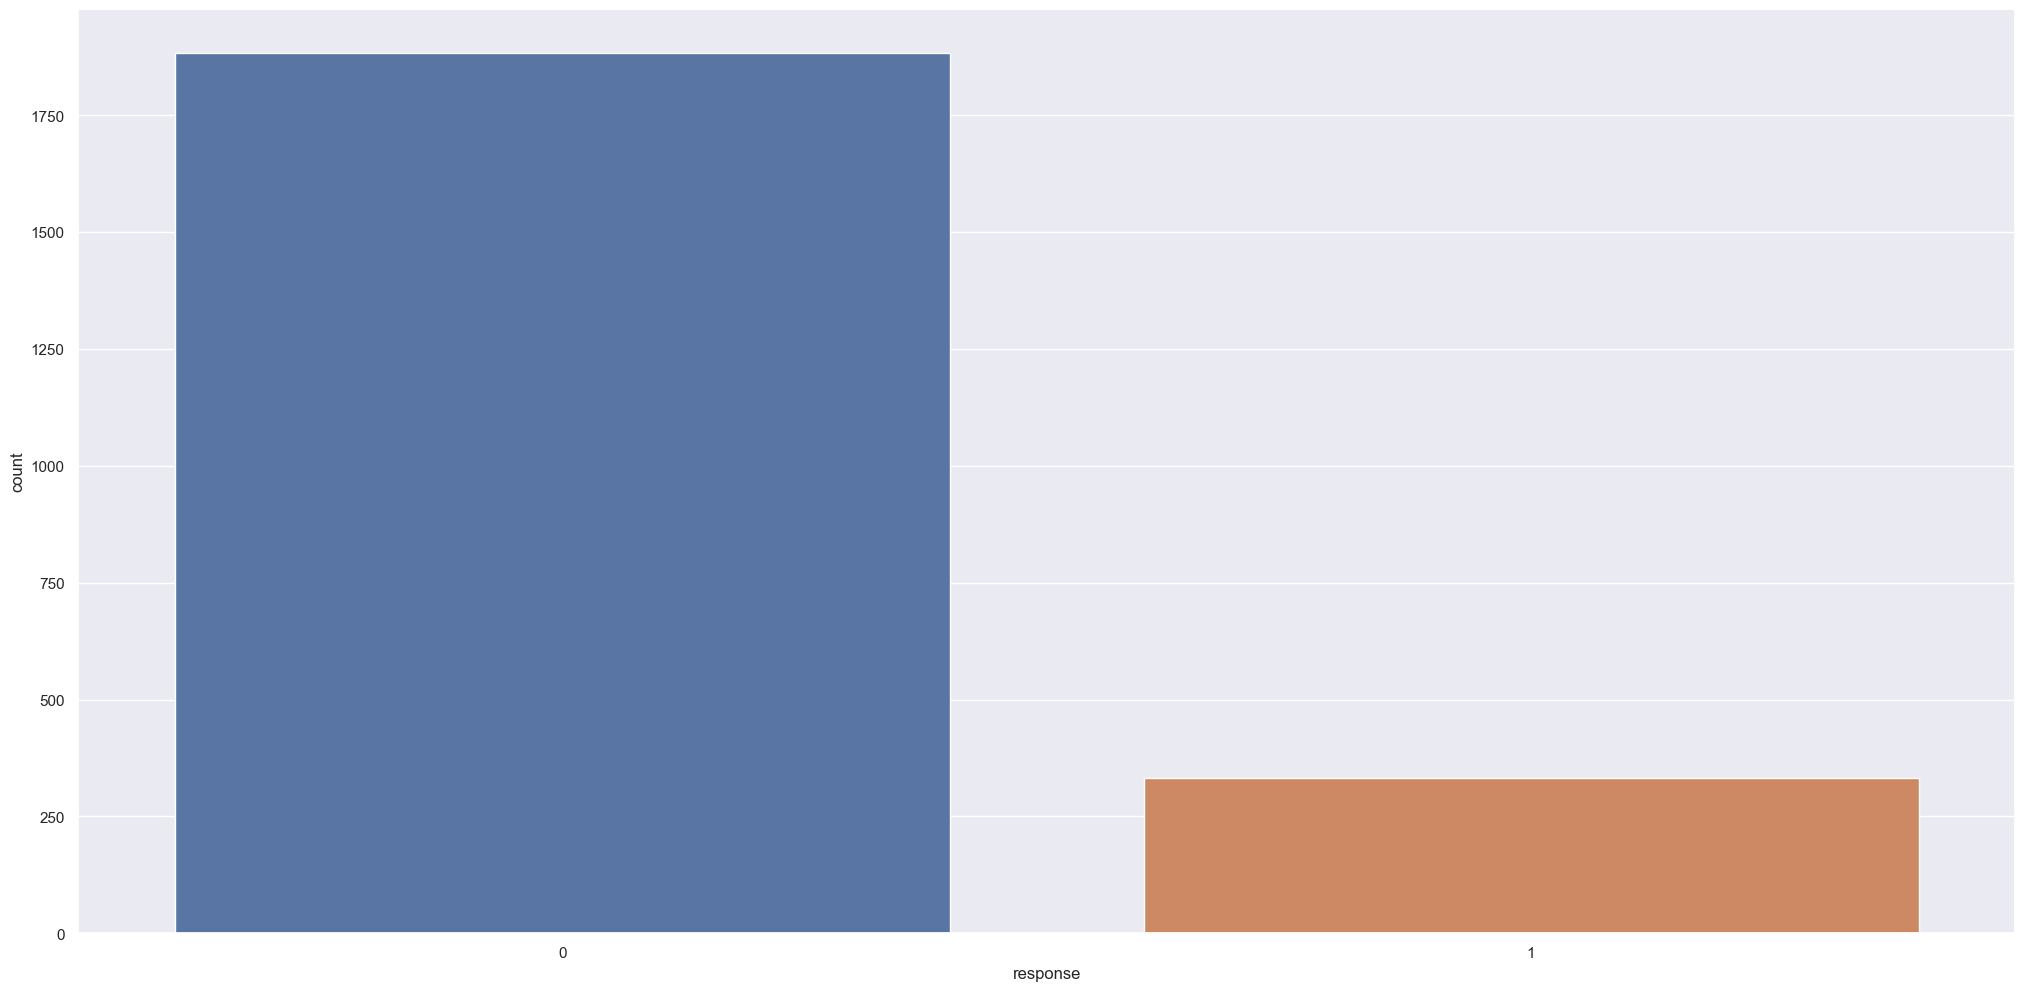

In [98]:
sns.countplot(x='response',data=cat_atributtes)

In [99]:
cat_atributtes['response'].value_counts(normalize=True)

0    0.849729
1    0.150271
Name: response, dtype: float64

**o problema trata-se de um classificação desbalanceada, com a classe majoritária com quase 85% de todo dataset**